# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49636.33
The current value of your 5.3 ETH is $13503.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50


In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('API_Key_ID')
alpaca_secret_key = os.getenv('Secret_Key')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [9]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_investments


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.52   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"])
spy_close_price = float(df_investments["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.83


In [11]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14141.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

amount
crypto  63139.447371
shares  37515.500000

<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

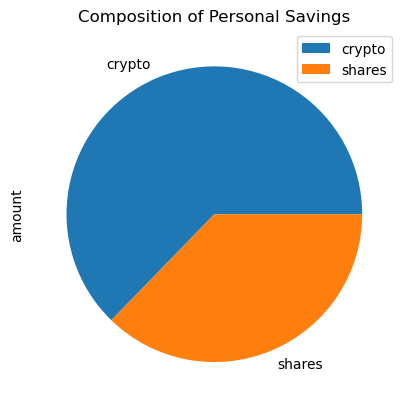

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
from MCForecastTools1 import MCSimulation

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-26', tz='America/New_York').isoformat()

In [26]:
# Get 5 years' worth of historical data for SPY and AGG
## Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.tail()


AGG                                               \
                            open     high     low  close   volume trade_count   
timestamp                                                                       
2023-06-20 04:00:00+00:00  98.28  98.5050  98.170  98.32  6694190       27802   
2023-06-21 04:00:00+00:00  98.09  98.5300  97.975  98.48  5579941       23714   
2023-06-22 04:00:00+00:00  98.17  98.3250  97.920  97.97  7147656       23865   
2023-06-23 04:00:00+00:00  98.49  98.5000  98.100  98.26  4577451       19181   
2023-06-26 04:00:00+00:00  98.50  98.5125  98.310  98.38  9233658       23881   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-06-20 04:00:00+00:00  98.376405  437.45  438.37  435.03  437.18   
2023-06-21 04:00:00+00:00  98.294563  436.16  436.99  434.33  434.94   
2023-06-22 04:00:00+00:00  98.020982  433.95  436.62  433.60  436.51   
2023-06-23 04:00:00+00:00  98.253577  432.93  435.06  432.47  433.21   
2023-06-26 04:00:00+00:00  98.408971  432.62  434.61  431.19  431.44   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-06-20 04:00:00+00:00  76171495      551377  437.143537  
2023-06-21 04:00:00+00:00  76991988      551853  435.564381  
2023-06-22 04:00:00+00:00  70637175      479203  435.448775  
2023-06-23 04:00:00+00:00  89196368      540194  433.858782  
2023-06-26 04:00:00+00:00  71248099      505212  432.526695

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [28]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2018-06-26 04:00:00+00:00  105.99  106.050  105.9405  106.05  2665247   
2018-06-27 04:00:00+00:00  106.23  106.310  106.1600  106.24  3001405   
2018-06-28 04:00:00+00:00  106.28  106.290  106.1600  106.23  1800528   
2018-06-29 04:00:00+00:00  106.30  106.420  106.2500  106.32  7118842   
2018-07-02 04:00:00+00:00  106.10  106.125  105.9900  105.99  7159907   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-26 04:00:00+00:00       10706  106.003623          NaN  271.64   
2018-06-27 04:00:00+00:00       11551  106.246940     0.001792  272.26   
2018-06-28 04:00:00+00:00        8124  106.226389    -0.000094  269.29   
2018-06-29 04:00:00+00:00       22824  106.321215     0.000847  272.12   
2018-07-02 04:00:00+00:00       17760  106.032887    -0.003104  269.51   

                                                                             \
                              high       low   close     volume trade_count   
timestamp                                                                     
2018-06-26 04:00:00+00:00  272.560  270.7900  271.58   68821261      304136   
2018-06-27 04:00:00+00:00  273.865  269.1800  269.80  105191674      418205   
2018-06-28 04:00:00+00:00  271.750  268.4900  270.91   77075079      367571   
2018-06-29 04:00:00+00:00  273.660  271.1495  271.34  102092599      329522   
2018-07-02 04:00:00+00:00  272.040  269.2400  271.84   63769156      279127   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-26 04:00:00+00:00  271.733259          NaN  
2018-06-27 04:00:00+00:00  271.108875    -0.006554  
2018-06-28 04:00:00+00:00  270.031931     0.004114  
2018-06-29 04:00:00+00:00  272.036249     0.001587  
2018-07-02 04:00:00+00:00  270.689557     0.001843

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997419  0.988593  0.993530  1.001915  0.992363  1.001668  0.997674   
2     0.995107  0.993492  0.987827  0.992427  0.995283  0.998489  0.993285   
3     0.986476  0.998420  0.991817  0.978912  0.987621  0.998215  1.001332   
4     0.990722  1.003611  0.992650  0.987077  0.985512  0.997676  1.000714   
...        ...       ...       ...       ...       ...       ...       ...   
7556  0.852671  4.052526  5.110932  2.620640  1.054190  1.739289  1.910373   
7557  0.847494  4.121966  5.112819  2.627544  1.057867  1.756945  1.928167   
7558  0.845252  4.145167  5.114071  2.598972  1.058294  1.740843  1.938734   
7559  0.848125  4.143702  5.136654  2.608672  1.056537  1.746050  1.950675   
7560  0.846775  4.142879  5.168703  2.608584  1.057670  1.764342  1.962391   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002056  0.997470  1.008001  ...  1.004378  1.004217  1.007396   
2     1.007359  0.999586  1.008524  ...  1.010128  1.015270  0.992970   
3     1.002211  1.003006  1.001501  ...  1.008486  1.018108  0.999216   
4     0.997965  1.008955  1.001634  ...  1.004019  1.017608  1.008916   
...        ...       ...       ...  ...       ...       ...       ...   
7556  2.304341  2.978013  3.861656  ...  6.926507  3.022805  1.307170   
7557  2.313347  2.963230  3.868294  ...  6.915324  3.016613  1.301036   
7558  2.330772  2.953097  3.855226  ...  6.975416  2.990972  1.293139   
7559  2.323215  2.928838  3.840620  ...  7.038943  2.988519  1.288532   
7560  2.326618  2.929496  3.856627  ...  7.063511  3.006985  1.288864   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997158  0.990779  0.996653  1.009020  0.991933  0.998441  0.991843  
2     1.004755  0.994011  0.983697  1.000367  0.988678  1.006493  0.986472  
3     1.000722  0.993020  0.977821  1.007189  0.986243  1.017169  0.989335  
4     1.004392  0.995486  0.984375  1.012749  0.984691  1.010939  0.995411  
...        ...       ...       ...       ...       ...       ...       ...  
7556  6.575326  1.931772  3.363507  2.493289  2.120488  3.459324  6.535480  
7557  6.621633  1.952046  3.361514  2.511770  2.119442  3.494022  6.593594  
7558  6.611720  1.932635  3.345685  2.532428  2.134664  3.527502  6.575194  
7559  6.591435  1.927350  3.338773  2.534684  2.135661  3.535272  6.543731  
7560  6.657633  1.953726  3.343596  2.526485  2.112080  3.543280  6.551724  

[7561 rows x 500 columns]

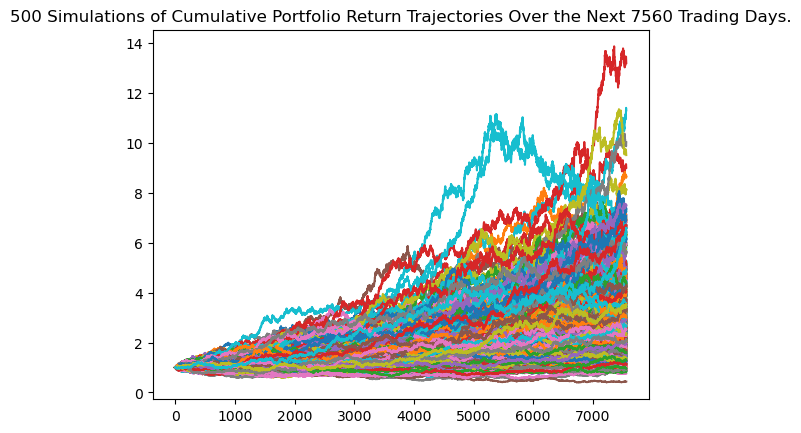

In [30]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

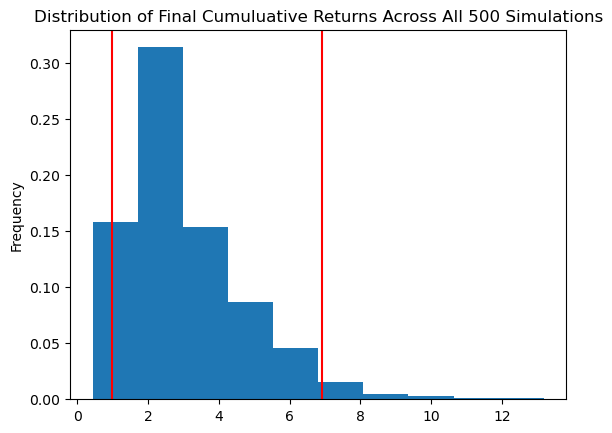

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.051794
std               1.694583
min               0.435211
25%               1.886410
50%               2.659494
75%               3.814648
max              13.183938
95% CI Lower      0.980066
95% CI Upper      6.928625
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19601.31 and $138572.51


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $29401.97 and $207858.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.990905  1.000277  1.003361  1.008482  0.994893  0.997009  1.000584   
2     1.001032  1.001648  1.011760  1.011594  0.993498  0.993777  1.000658   
3     1.005849  0.999248  1.007389  1.022776  0.986081  0.992271  0.997602   
4     0.996494  1.009830  1.002612  1.015581  0.983184  0.994765  0.994769   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.017675  1.023014  1.693195  0.967073  1.641954  1.012016  1.169197   
1257  1.014486  1.022131  1.699776  0.968702  1.645279  1.013544  1.179428   
1258  1.019207  1.025446  1.712064  0.960863  1.637378  1.011417  1.177605   
1259  1.011812  1.029329  1.706957  0.949110  1.642959  1.025570  1.177113   
1260  1.001844  1.020067  1.709736  0.943027  1.656051  1.022985  1.182877   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998631  0.996228  0.998854  ...  0.998189  1.013068  0.999448   
2     1.003375  0.998272  1.003089  ...  0.988009  1.023749  1.002546   
3     1.003415  0.999042  0.997359  ...  0.990570  1.024716  1.007134   
4     1.004934  0.985248  1.010075  ...  0.992908  1.022815  1.005266   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.198784  0.744096  1.041122  ...  0.836982  1.303549  1.317212   
1257  1.200504  0.743019  1.044022  ...  0.833671  1.302091  1.319785   
1258  1.196907  0.742105  1.047392  ...  0.835717  1.308966  1.305340   
1259  1.196249  0.741895  1.055120  ...  0.844267  1.305971  1.298903   
1260  1.191479  0.740124  1.057015  ...  0.847581  1.300534  1.299461   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.009602  0.996155  0.994474  1.011214  1.001751  1.002136  0.993559  
2     1.004193  0.992546  1.003438  1.012244  0.998024  1.002076  0.991543  
3     1.005937  0.987287  1.007604  1.020522  0.999592  1.004807  0.993891  
4     1.012300  0.990588  1.004408  1.029842  0.997542  1.005400  0.997606  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.474204  1.318354  1.416797  1.498514  1.040248  0.967513  1.457641  
1257  1.484694  1.302398  1.425016  1.504851  1.048536  0.966867  1.430619  
1258  1.479034  1.303488  1.419060  1.506976  1.050086  0.970832  1.428441  
1259  1.470916  1.311268  1.420346  1.500631  1.052341  0.973104  1.420170  
1260  1.469259  1.322565  1.409497  1.500888  1.059682  0.974383  1.434877  

[1261 rows x 500 columns]

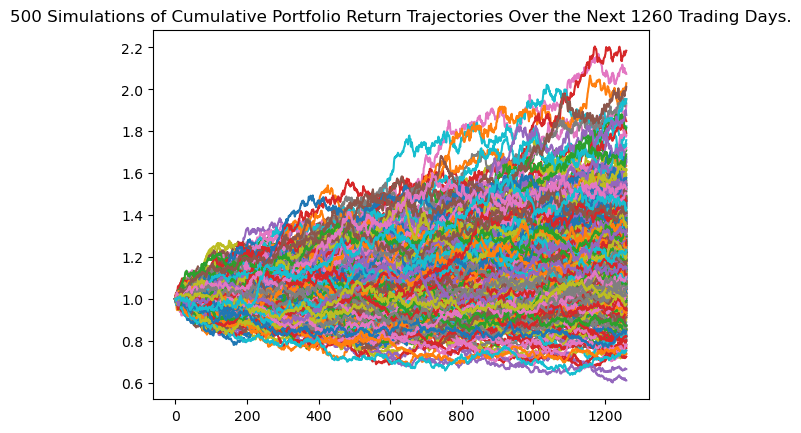

In [37]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

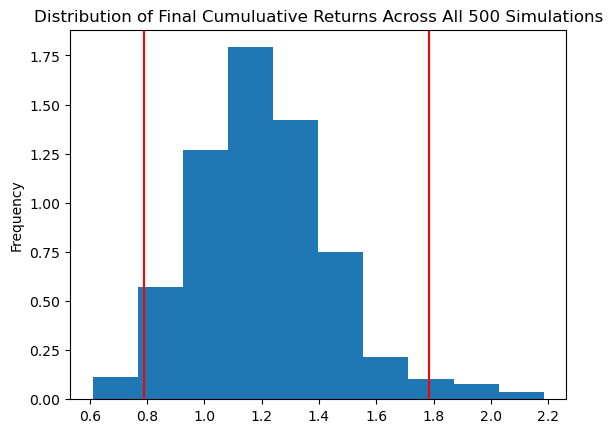

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.206562
std               0.243820
min               0.610700
25%               1.045995
50%               1.183490
75%               1.341791
max               2.184599
95% CI Lower      0.790272
95% CI Upper      1.784811
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*60000,2)
ci_upper = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [43]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.005183  1.001274  1.007350  0.994668  1.007216  0.995673  0.997410   
2     1.007103  0.997631  1.012844  0.992099  1.010045  1.004118  1.000385   
3     1.006703  0.997100  1.014801  0.989546  1.011102  1.006693  1.004143   
4     1.005642  1.002156  1.025553  0.990538  1.009425  1.018406  1.002800   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.302323  1.125266  1.383222  1.450059  1.627900  1.815581  1.952522   
2517  1.295233  1.118912  1.382047  1.446025  1.638181  1.793409  1.946338   
2518  1.299714  1.117082  1.373082  1.434907  1.631038  1.794703  1.935803   
2519  1.305133  1.126863  1.368079  1.424489  1.626175  1.799146  1.941138   
2520  1.304357  1.121715  1.364435  1.431266  1.620703  1.807997  1.922679   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.009208  1.011318  1.009495  ...  0.995743  1.006733  0.999640   
2     1.009035  1.006666  1.017193  ...  0.985290  1.006867  0.994852   
3     1.010168  1.008228  1.027141  ...  0.981557  1.002607  1.002152   
4     1.008908  0.995192  1.033334  ...  0.984405  0.998817  1.003714   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.294119  1.932842  1.421825  ...  2.326137  1.023450  1.636409   
2517  1.290979  1.944931  1.422822  ...  2.321570  1.034839  1.628033   
2518  1.283845  1.944214  1.425024  ...  2.325261  1.033542  1.636878   
2519  1.282813  1.951229  1.432313  ...  2.367952  1.031514  1.633788   
2520  1.284202  1.963855  1.426415  ...  2.368571  1.037288  1.631174   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.005011  1.003122  1.000921  0.996328  0.998696  0.997972  1.009468  
2     0.996883  1.003915  1.002175  0.991752  1.000566  0.997862  1.014708  
3     0.993067  1.003242  0.999807  0.984222  0.994013  0.996812  1.012165  
4     0.977093  0.997796  0.995355  0.990278  0.989057  0.998710  1.014412  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.001048  1.111464  1.057226  1.766552  1.097733  1.740301  1.331273  
2517  0.999729  1.121409  1.063052  1.774314  1.102553  1.748472  1.329923  
2518  1.011060  1.115271  1.060104  1.773071  1.113635  1.750006  1.341108  
2519  1.017814  1.124167  1.046764  1.770020  1.109883  1.731548  1.333898  
2520  1.015284  1.113361  1.042597  1.778888  1.105669  1.736430  1.329567  

[2521 rows x 500 columns]

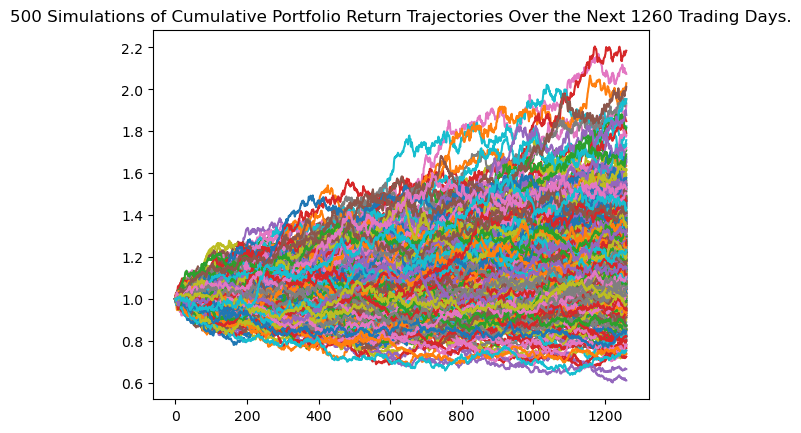

In [44]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

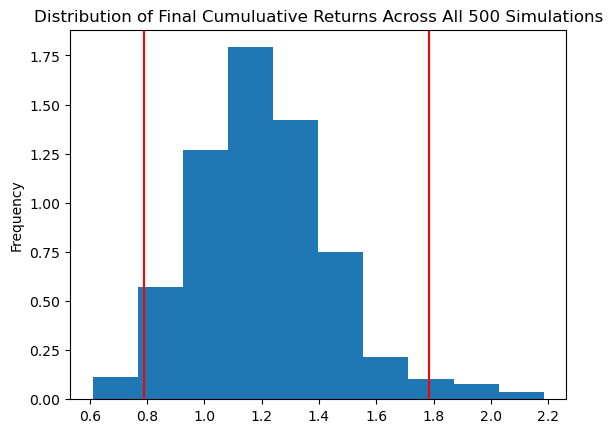

In [45]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.449553
std               0.446147
min               0.517388
25%               1.092154
50%               1.376391
75%               1.704655
max               2.870927
95% CI Lower      0.784904
95% CI Upper      2.550286
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
initial_investment = 30000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*60000,2)
ci_upper = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")